# Introduction to Unsupervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 13)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1) Clustering

First let's load the iris data set, which is included in `scikit-learn`, and read its description. The `iris` object below acts like a dictionary that includes tabular data along with some metadata.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**Problem 1a** Make a pair plot (a.k.a. scatter matrix, a.k.a. corner plot) showing all four features plotted against each other. You can do this any way you want, but I suggest using `pandas.plotting.scatter_matrix` or `seaborn.pairplot` instead of `corner.corner` because there are so few points.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

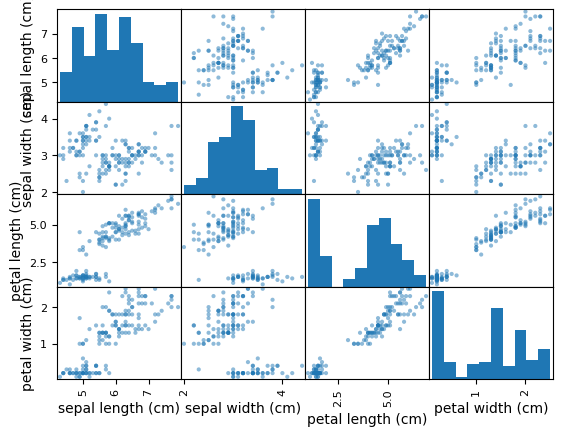

In [11]:
import pandas as pd

df = pd.DataFrame(iris.data, columns = iris.feature_names) # convert sklearn dataset to pandas
pd.plotting.scatter_matrix(df)


**Problem 1b** Let's try to find clusters in this 4-dimensional feature space. Fit two different $K$-means models to the iris data, one with 2 clusters and one with 3 clusters. Make new pair plots but color the points by their cluster membership. According to your plots, which feature(s) is/are most correlated with the clusters? Why might that be?

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

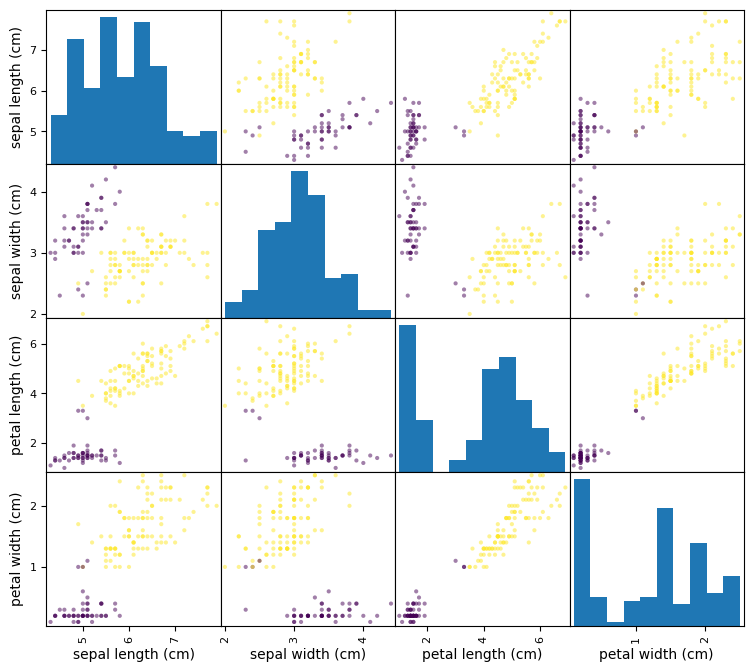

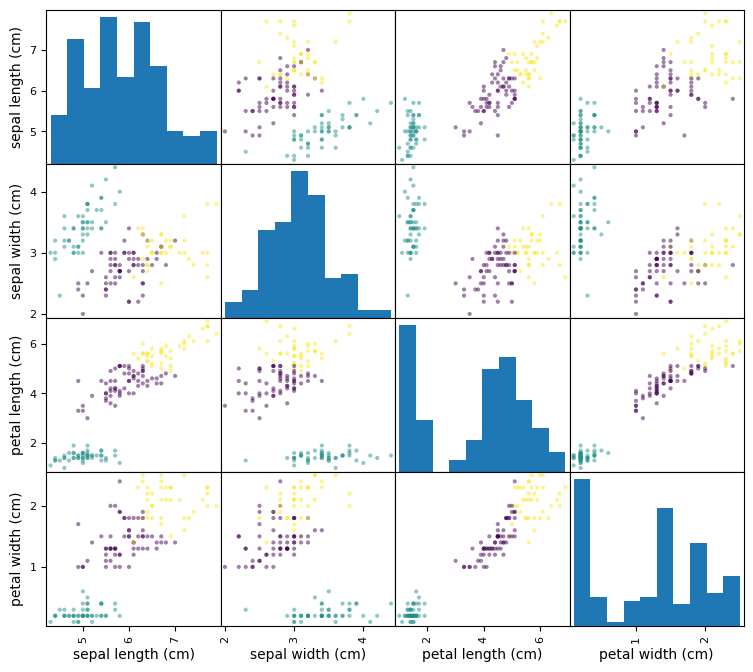

In [33]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, n_init=10)
kmeans2.fit(df)
clusters2 = kmeans2.fit_predict(df, y=None, sample_weight=None)
print(clusters2)

pd.plotting.scatter_matrix(df, c = clusters2, figsize = (9,8))

kmeans3 = KMeans(n_clusters=3, n_init=10)
kmeans3.fit(df)
clusters3 = kmeans3.fit_predict(df, y=None, sample_weight=None)
print(clusters3)

pd.plotting.scatter_matrix(df, c = clusters3, figsize = (9,8))

*Complete*

The truth is that the iris data set is fairly small and straightfoward. Nevertheless, we will now examine the clustering results after re-scaling the features. [Some algorithms are notoriously sensitive to the feature scaling, so it is important to know about this step.] Imagine you are classifying stellar light curves: the data set will include contact binaries with periods of $\sim 0.1 \; \mathrm{d}$ and Mira variables with periods of $\gg 100 \; \mathrm{d}$. Without re-scaling, this feature that covers 4 orders of magnitude may dominate all others in the final model projections.

The two most common forms of re-scaling are to rescale to a Gaussian with mean $= 0$ and variance $= 1$, or to rescale the min and max of the feature to $[0, 1]$. The best normalization is problem dependent. The [`sklearn.preprocessing`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module makes it easy to re-scale the feature set. **It is essential that the same scaling used for the training set be used for all other data run through the model.** The testing, validation, and field observations cannot be re-scaled independently. This would result in meaningless final classifications/predictions. 

**Problem 1c** Re-scale the features to normal distributions, and perform $K$-means clustering on the iris data. How do the results compare to those obtained earlier? 

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

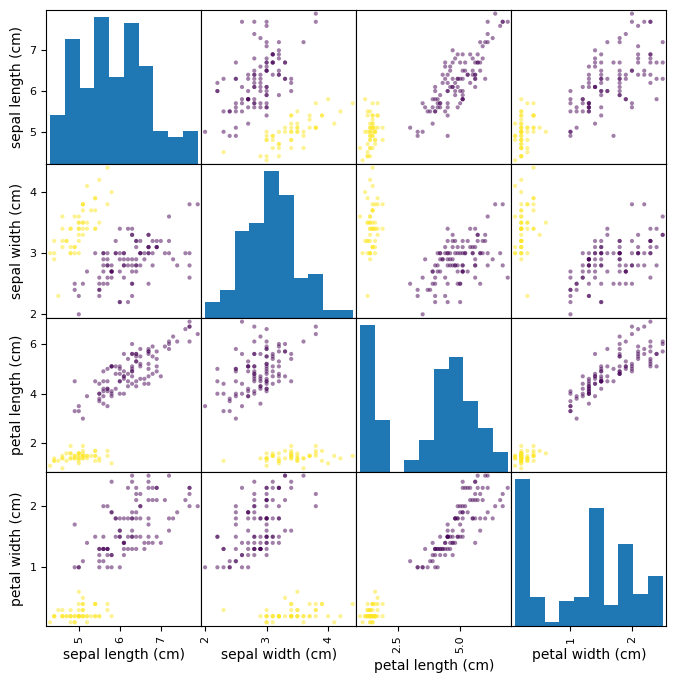

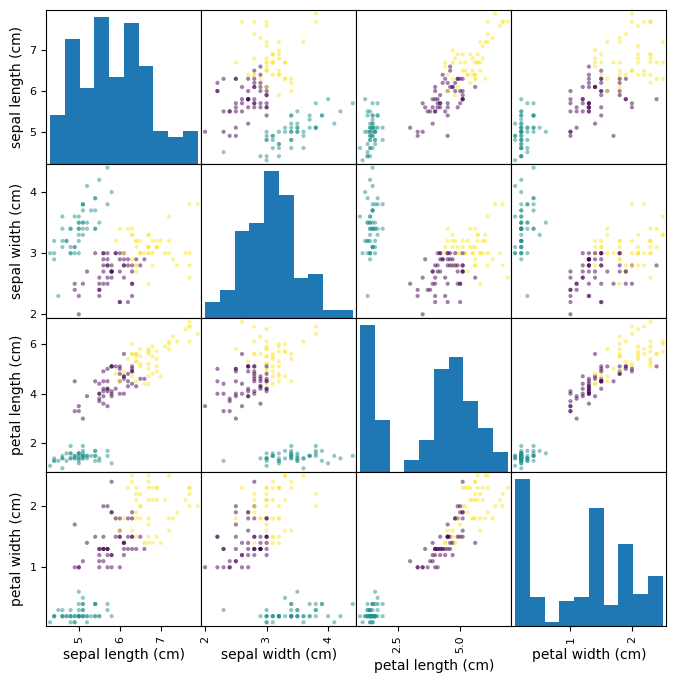

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

plot_scaled_df = pd.DataFrame(df_scaled, columns = iris.feature_names)

kmeans2scaled = KMeans(n_clusters=2, n_init=10, random_state=30)
clusters2scaled = kmeans2scaled.fit_predict(plot_scaled_df)

kmeans3scaled = KMeans(n_clusters=3, n_init=10, random_state=30)
clusters3scaled = kmeans3scaled.fit_predict(plot_scaled_df)

pd.plotting.scatter_matrix(df, c = clusters2scaled, figsize = (8,8))
pd.plotting.scatter_matrix(df, c = clusters3scaled, figsize = (8,8))

*Complete*

**Problem 1d** Let's try more complex feature engineering using principal component analysis. Find the principal components of the iris data set and cluster the data points according their projection onto the **top 2** principal components. How much of the variance do these two components capture?
Plot the results both in the principal component space *and* in the original feature space. How do your results compare to the simpler preprocessing? Is there another benefit to using PCA?

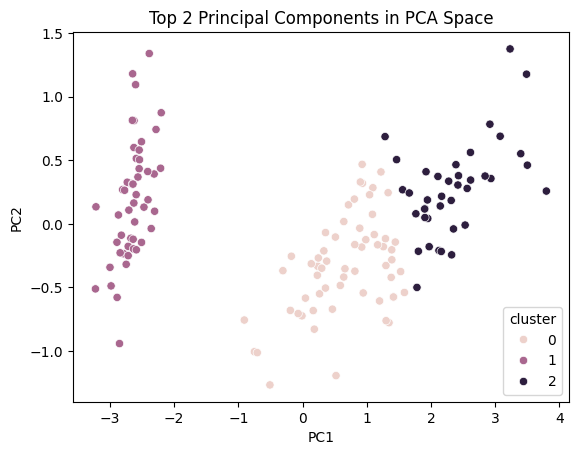

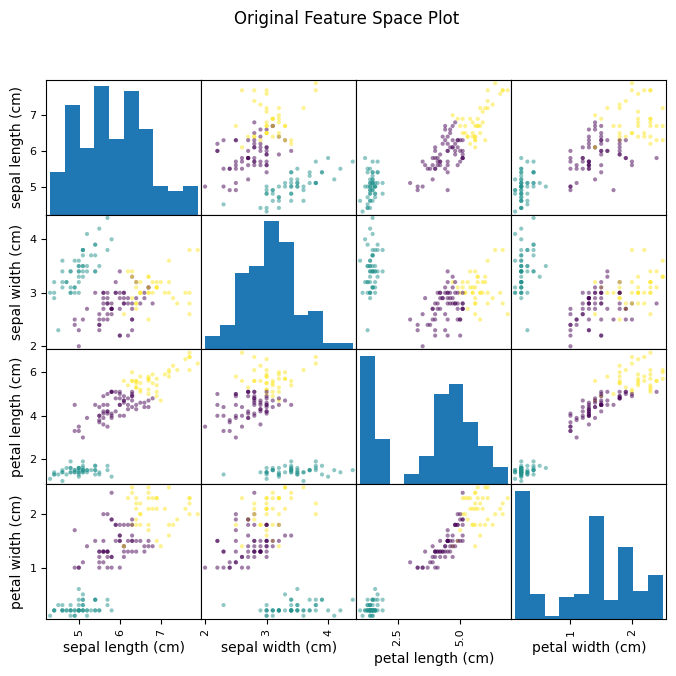

In [44]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2) # 2 principal components defined
pca_transform = pca.fit_transform(df) # finds principal components of data that capture the most variation
iris_var = pca.explained_variance_ratio_ # variance of the two components

kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=30)
pca_clusters = kmeans_pca.fit_predict(pca_transform)

# plot in PCA space
plot_pca = pd.DataFrame(pca_transform, columns = ['PC1', 'PC2'])
plot_pca['cluster'] = pca_clusters
sns.scatterplot(data=plot_pca, x = 'PC1', y = 'PC2', hue = 'cluster')
plt.title('Top 2 Principal Components in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# plot in original feature space
plot_orig = df.copy()
plot_orig['cluster'] = pca_clusters
pd.plotting.scatter_matrix(plot_orig.iloc[:, :4], c=plot_orig['cluster'], figsize = (8,7))
plt.suptitle('Original Feature Space Plot')
plt.show()


*Complete*

**Problem 1e** Our data set might include outliers that should not belong to any of the clusters, but $K$-means will always assign points to the nearest cluster. Instead, try clustering the iris data using an algorithm called `DBSCAN`. Play around with the tuning parameters to see how they affect the final clustering results. How does the use of `DBSCAN` compare to $K$-means? Can you obtain 3 clusters with `DBSCAN`?

*Note - DBSCAN labels outliers as `-1`, so all these points will be plotted as the same color.*


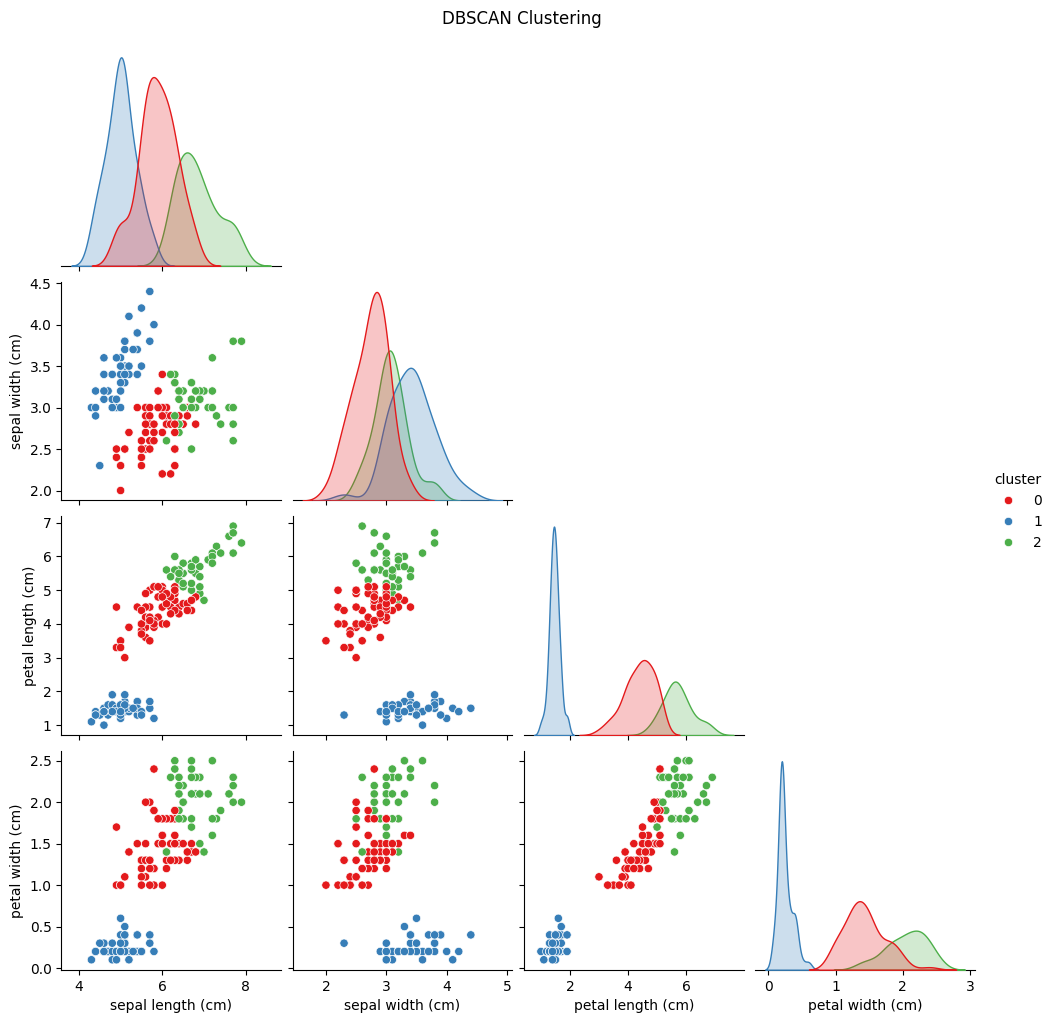

There are 2 clusters and 26 outliers using DBSCAN.


In [49]:
df_plot = plot_orig
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=5)
db_clusters = dbscan.fit_predict(df_scaled)

sns.pairplot(df_plot, hue='cluster', palette='Set1', corner=True)
plt.suptitle("DBSCAN Clustering", y=1.02)
plt.show()

n_clusters = len(set(db_clusters)) - (1 if -1 in db_clusters else 0)
n_outliers = list(db_clusters).count(-1)
print(f"There are {n_clusters} clusters and {n_outliers} outliers using DBSCAN.")

*Complete*

# Problem 2) Correlation Function

Imagine we looked in the sky in a certain direction and saw a perfect circle of 50 galaxies with a radius of 1$^\circ$. This would imply highly correlated structure in the universe on the scale of $\sim 2^\circ$. Let's show this by calculating the correlation function for such a structure.

**Problem 2a** Generate the data set in question, the right ascension and declination ($x$ and $y$) for a circle of 50 galaxies centered on (0, 0) with radius $1^\circ$. Ignore spherical geometry for now and just assume everything is Euclidean for this small patch of sky.

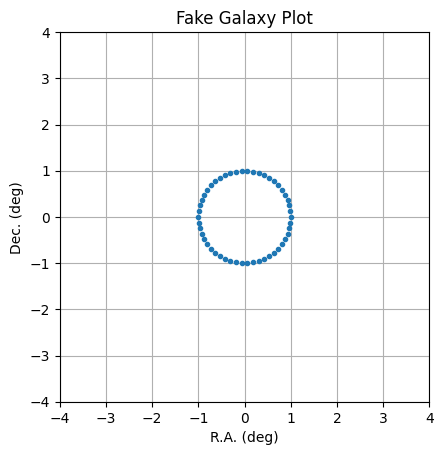

In [50]:
galaxies = 50
radius = 1 # degrees
theta = np.linspace(0, 2 * np.pi, galaxies, endpoint=False)

# compute RA and DEC positions
xx = radius * np.cos(theta) # RA
yy = radius * np.sin(theta) # DEC

ax = plt.axes(aspect='equal')
ax.plot(xx, yy, '.')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)
plt.title("Fake Galaxy Plot")
plt.grid(True)
plt.show()

**Problem 2b** Generate a data set of randomly distributed points over the same patch of sky. Make sure your data set is $\sim20\times$ larger than the "observed" data set above. To avoid edge effects, I suggest using $-4<x,y<4$.

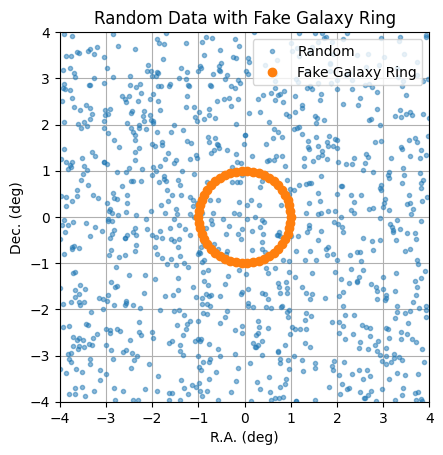

In [51]:
random_data = 1000 # 20x larger than galaxies = 50
x_shape = np.random.uniform(-4, 4, random_data)
y_shape = np.random.uniform(-4, 4, random_data)

ax = plt.axes(aspect='equal')
ax.plot(x_shape, y_shape, '.', alpha = 0.5, label = 'Random')
ax.plot(xx, yy, 'o', label = 'Fake Galaxy Ring')
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec. (deg)')
ax.set_xlim(-4., 4.)
ax.set_ylim(-4., 4.)
plt.title("Random Data with Fake Galaxy Ring")
plt.legend()
plt.grid(True)
plt.show()

**Problem 2c** Calculate the distance between each pair of points in each data set. Plot histograms of each set of distances.  
*Hint:* exclude pairs matching the same point with itself.  
*Challenge:* try using broadcasting instead of loops to make each pair. 

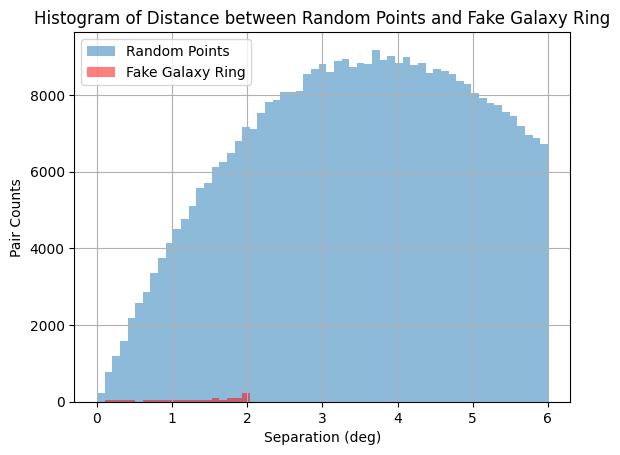

In [58]:
galaxy_data = np.vstack((xx, yy)).T
dx_galaxydata = galaxy_data[:, np.newaxis, :] - galaxy_data[np.newaxis, :, :]
galaxy_distance = np.linalg.norm(dx_galaxydata, axis=2)
galaxy_distance = galaxy_distance[np.triu_indices_from(galaxy_distance, k=1)]

random_points = np.vstack((x_shape, y_shape)).T
dx_randompoints = random_points[:, np.newaxis, :] - random_points[np.newaxis, :, :]
random_distance = np.linalg.norm(dx_randompoints, axis=2)
random_distance = random_distance[np.triu_indices_from(random_distance, k=1)]

bins = np.linspace(0, 6, 60)
n_rand, bins, _ = plt.hist(random_distance, bins=bins, alpha=0.5, label='Random Points')
n_real, bins, _ = plt.hist(galaxy_distance, bins=bins, alpha=0.5, label='Fake Galaxy Ring', color = 'red')
plt.legend(loc='best')
plt.xlabel('Separation (deg)')
plt.ylabel('Pair Counts')
plt.title('Histogram of Distance between Random Points and Fake Galaxy Ring')
plt.grid(True)
plt.show()

**Problem 2d** Estimate the two-point autocorrelation function for the real data, with the random data as a reference. Plot it as a function of separation. What did you learn about the large-scale structure in this portion of the sky?

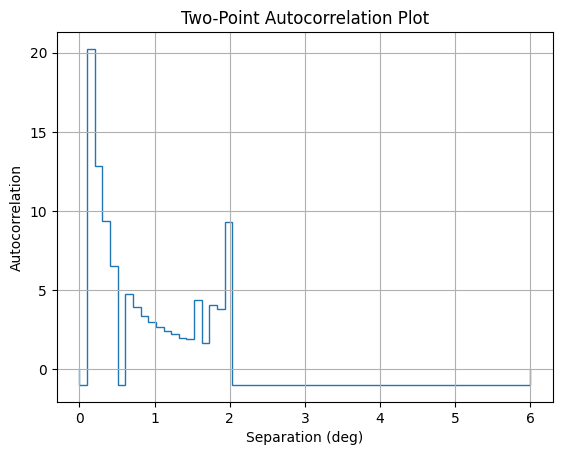

In [62]:
bins = np.linspace(0, 6, 60)

galaxy_hist, _ = np.histogram(galaxy_distance, bins=bins)
random_hist, _ = np.histogram(random_distance, bins=bins)

galaxy_norm = galaxy_hist / np.sum(galaxy_hist) # normalization
random_norm = random_hist / np.sum(random_hist)

autocorr = galaxy_norm / random_norm - 1
plt.stairs(autocorr, edges = bins)
plt.xlabel('Separation (deg)')
plt.ylabel('Autocorrelation')
plt.title("Two-Point Autocorrelation Plot")
plt.grid(True)
plt.show()

*Complete*